In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score

import warnings
import platform
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as spst
import pandas as pd 


from matplotlib import font_manager, rc 
warnings.filterwarnings('ignore')

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

In [2]:
df = pd.read_csv("Total_Data_5.csv")
df.head(2)

,content_cnt,content_line,quote_cnt,img_cnt,솔직 빈도 수,비교 빈도 수,ㅋ 빈도 수,ㅋㅋ 빈도 수,ㅋㅋㅋ 빈도 수,ㅋㅋㅋㅋ 빈도 수,...,솔직키워드2,이미지광고키워드1,이미지광고키워드2,이미지광고키워드3,이미지쿠팡키워드1,이미지순수키워드1,이미지없음,이미지글없음,광고 분류1,광고 분류2
0,1455,14,0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2680,7,0,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2


In [5]:
df = df[[   'content_cnt', 'content_line', '내돈내산 키워드','img_cnt','ㅋㅋㅋㅋ 빈도 수', '... 빈도 수','쿠팡키워드','coupan.ng 키워드','단점 빈도 수',  '광고키워드','이미지광고키워드3',
        '솔직 빈도 수', '솔직키워드1', '비교 빈도 수','quote_cnt', 'ㅋ 빈도 수','ㅠㅠ 빈도 수', 'ㅋㅋㅋ 빈도 수', '이미지광고키워드1', '이미지쿠팡키워드1', '이미지순수키워드1','이미지광고키워드2',
        '이미지없음', '이미지글없음', 
        '광고 분류1', '광고 분류2']]
df.shape

(2470, 26)

## 학습용, 테스트 데이터 나누기

In [6]:
XX_train, X_test, yy_train, y_test = train_test_split(df.drop(["광고 분류1","광고 분류2"],axis=1),df["광고 분류2"], test_size=0.3, random_state=42, stratify= df["광고 분류2"] )

## 학습용, 검증용 데이터 나누기

In [7]:
x_train, x_val, y_train, y_val= train_test_split(XX_train, yy_train, test_size=0.2, random_state=42, stratify= yy_train)

In [8]:
y_train1 = y_train.copy()

In [9]:
y_train1.loc[y_train1 >=1] = 1

In [10]:
y_train1.value_counts()

0    1082
1     301
Name: 광고 분류2, dtype: int64

## 모델링

In [11]:
result = {}

In [12]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lg_model = LogisticRegression(random_state=42)
xgb_model = XGBClassifier(max_depth =3,random_state=42)

In [13]:
dt_score = cross_val_score(dt_model,x_train,y_train,scoring='accuracy',cv=5)
result["DT"] = [dt_score.mean()]

dt_score = cross_val_score(rf_model,x_train,y_train,scoring='accuracy',cv=5)
result["Rf"] = [dt_score.mean()
]
dt_score = cross_val_score(lg_model,x_train,y_train,scoring='accuracy',cv=5)
result["lg"] =[ dt_score.mean()]

dt_score = cross_val_score(xgb_model,x_train.values,y_train,scoring='accuracy',cv=5)
result["XGB"] =[ dt_score.mean()]

[14:35:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

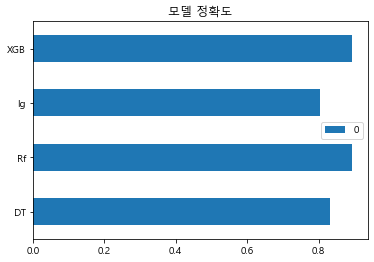

In [14]:
pd.DataFrame(result).T.plot(kind="barh",title="모델 정확도");

In [15]:
result

{'DT': [0.8315021189766127],
 'Rf': [0.8929864490137602],
 'lg': [0.8040757599539582],
 'XGB': [0.8929786009522314]}

In [16]:
xgb_model = XGBClassifier(max_depth =3,random_state=42)

In [17]:
xgb_model.fit(x_train.values,y_train)

[14:35:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [18]:
y_pred = xgb_model.predict(x_val.values)

In [19]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
accuracy_score(y_val,y_pred)

0.8901734104046243

In [20]:
y_pred = xgb_model.predict(X_test.values)

In [21]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.8771929824561403

In [22]:
confusion_matrix(y_test,y_pred)

array([[557,   1,  22],
       [ 26,  23,   4],
       [ 33,   5,  70]], dtype=int64)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       580
           1       0.79      0.43      0.56        53
           2       0.73      0.65      0.69       108

    accuracy                           0.88       741
   macro avg       0.81      0.68      0.73       741
weighted avg       0.87      0.88      0.87       741



## 이진 분류
광고냐 vs 아니냐

In [38]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lg_model = LogisticRegression(random_state=42)
xgb_model = XGBClassifier(random_state=42)

In [40]:
from catboost import CatBoostClassifier

cat_model  = CatBoostClassifier(random_state=42)

In [41]:
dt_score = cross_val_score(dt_model,x_train,y_train1,scoring='accuracy',cv=5)
result["DT"] = [dt_score.mean()]

dt_score = cross_val_score(rf_model,x_train,y_train1,scoring='accuracy',cv=5)
result["Rf"] = [dt_score.mean()
]
dt_score = cross_val_score(lg_model,x_train,y_train1,scoring='accuracy',cv=5)
result["lg"] =[ dt_score.mean()]

dt_score = cross_val_score(xgb_model,x_train.values,y_train1.values,scoring='accuracy',cv=5)
result["XGB"] =[ dt_score.mean()]

cat_score = cross_val_score(cat_model,x_train.values,y_train1.values,scoring='accuracy',cv=5)
result["cat"] =[ cat_score.mean()]

[14:39:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [42]:
result

{'DT': [0.8401873070684875],
 'Rf': [0.8958666875948307],
 'lg': [0.8597002040495998],
 'XGB': [0.8835687751791973],
 'cat': [0.89587191963585]}

In [37]:
y_train1.value_counts() / y_train1.value_counts().sum() 

0    0.782357
1    0.217643
Name: 광고 분류2, dtype: float64

In [44]:
rf_model.fit(x_train.values,y_train1)

RandomForestClassifier(random_state=42)

In [43]:
cat_model.fit(x_train.values,y_train1)

Learning rate set to 0.011832
0:	learn: 0.6834212	total: 3.36ms	remaining: 3.36s
1:	learn: 0.6736804	total: 7.17ms	remaining: 3.58s
2:	learn: 0.6633678	total: 13ms	remaining: 4.33s
3:	learn: 0.6539371	total: 17.1ms	remaining: 4.26s
4:	learn: 0.6462198	total: 24.2ms	remaining: 4.83s
5:	learn: 0.6373446	total: 28.7ms	remaining: 4.76s
6:	learn: 0.6284909	total: 32.1ms	remaining: 4.55s
7:	learn: 0.6197744	total: 37.7ms	remaining: 4.67s
8:	learn: 0.6115827	total: 41.7ms	remaining: 4.59s
9:	learn: 0.6046546	total: 44.8ms	remaining: 4.44s
10:	learn: 0.5962809	total: 47.8ms	remaining: 4.29s
11:	learn: 0.5891611	total: 50.7ms	remaining: 4.17s
12:	learn: 0.5845241	total: 53.2ms	remaining: 4.04s
13:	learn: 0.5777172	total: 56.3ms	remaining: 3.97s
14:	learn: 0.5709344	total: 59.1ms	remaining: 3.88s
15:	learn: 0.5659092	total: 62.3ms	remaining: 3.83s
16:	learn: 0.5600886	total: 66.1ms	remaining: 3.82s
17:	learn: 0.5524355	total: 68.9ms	remaining: 3.76s
18:	learn: 0.5451247	total: 72.4ms	remaining: 

In [45]:
xgb_model.fit(x_train.values,y_train1)

[14:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
xgb_y_pred = xgb_model.predict(x_val)
rf_y_pred = rf_model.predict(x_val)
cat_y_pred = cat_model.predict(x_val)

In [47]:
y_val.loc[y_val>=1]= 1 

In [48]:
print(accuracy_score(y_val,xgb_y_pred))
print(accuracy_score(y_val,rf_y_pred))
print(accuracy_score(y_val,cat_y_pred))

0.8901734104046243
0.8786127167630058
0.884393063583815


In [49]:
y_test.loc[y_test>=1]= 1 

In [50]:
xgb_y_pred = xgb_model.predict(X_test.values)
rf_y_pred = rf_model.predict(X_test.values)
cat_y_pred = cat_model.predict(X_test.values)

In [51]:
print(accuracy_score(y_test,xgb_y_pred))
print(accuracy_score(y_test,rf_y_pred))
print(accuracy_score(y_test,cat_y_pred))

0.8893387314439946
0.8960863697705803
0.8987854251012146


In [54]:
print(classification_report(y_test,xgb_y_pred))
print()

print(classification_report(y_test,rf_y_pred))
print()
print(classification_report(y_test,cat_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       580
           1       0.81      0.65      0.72       161

    accuracy                           0.89       741
   macro avg       0.86      0.80      0.82       741
weighted avg       0.88      0.89      0.88       741


              precision    recall  f1-score   support

           0       0.90      0.97      0.94       580
           1       0.85      0.63      0.73       161

    accuracy                           0.90       741
   macro avg       0.88      0.80      0.83       741
weighted avg       0.89      0.90      0.89       741


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       580
           1       0.86      0.63      0.73       161

    accuracy                           0.90       741
   macro avg       0.88      0.80      0.83       741
weighted avg       0.90      0.90      0.89       741



## 원인 파악 
Shap value 활용

In [119]:
X_test.shape

(741, 49)

In [83]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_train.values)

In [84]:
columns1 = list(x_train)

In [85]:
y_pred = cat_model.predict(x_train.values)

In [86]:
idx = 2
print(f"실제 y 값 : {y_train.values[idx]}  예측값 : {y_pred[idx]}  (1 : 광고, 0 : 순수)")
shap.force_plot(explainer.expected_value,
               shap_values[idx, :],
               x_train.iloc[idx,:], link='logit') # link='logit'

실제 y 값 : 0  예측값 : 0  (1 : 광고, 0 : 순수)


In [87]:
idx = 356
print(f"실제 y 값 : {y_train.values[idx]}  예측값 : {y_pred[idx]} (1 : 광고, 0 : 순수)")
shap.force_plot(explainer.expected_value,
               shap_values[idx, :],
                x_train.iloc[idx,:], link='logit') # link='logit'

실제 y 값 : 0  예측값 : 0 (1 : 광고, 0 : 순수)


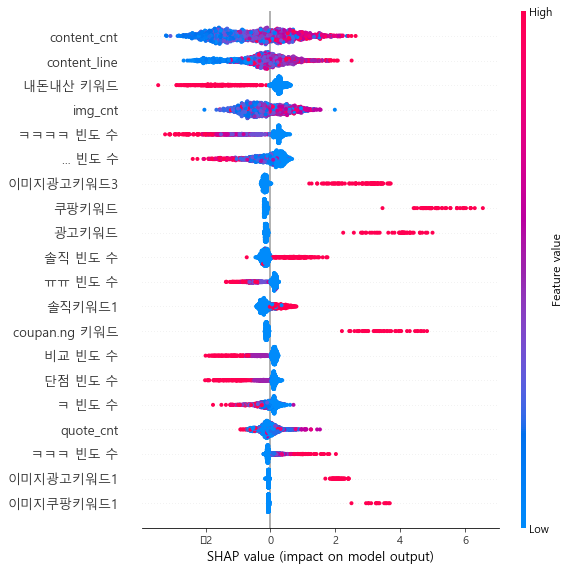

In [88]:
shap.summary_plot(shap_values,x_train.values,feature_names=columns1)

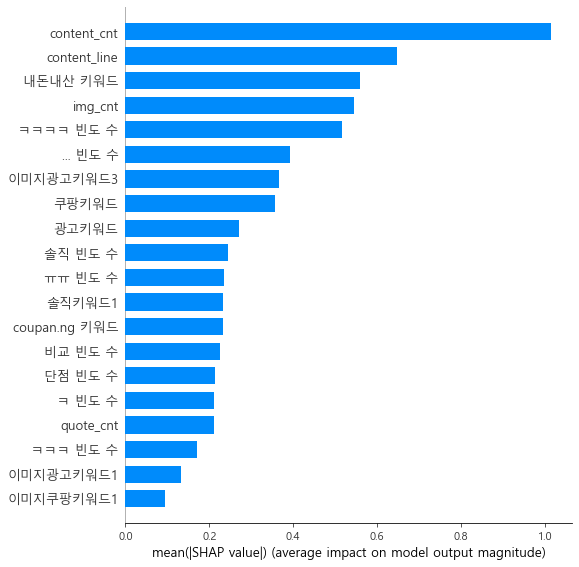

In [67]:
shap.summary_plot(shap_values, x_train, plot_type='bar', feature_names=columns1)

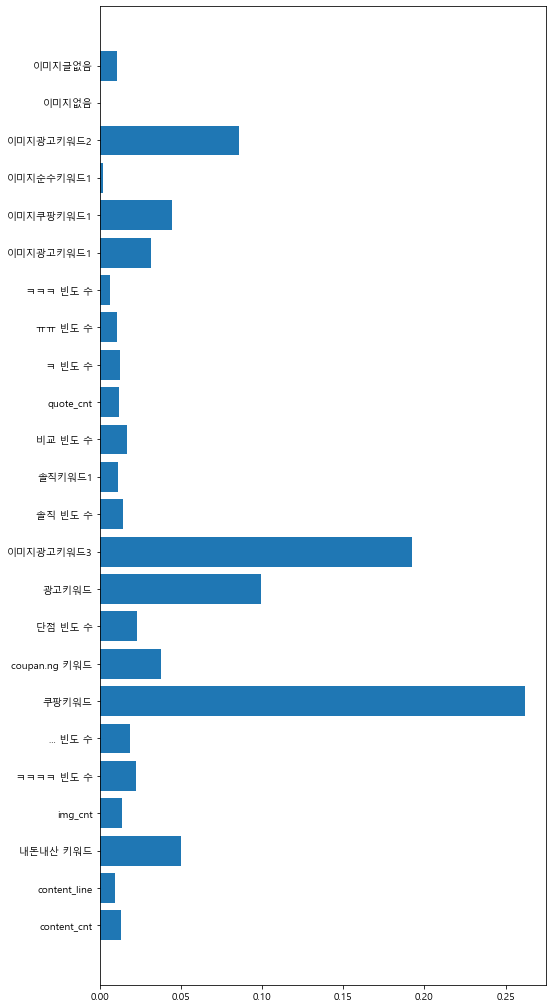

In [62]:
plt.figure(figsize=(8,18))
plt.barh(y=list(x_train), width=xgb_model.feature_importances_.reshape(-1))
plt.show()

## 모델 저장 및 모델 로드

In [89]:
import joblib
joblib.dump(xgb_model, './model/xgb_model_v2.pkl')
joblib.dump(rf_model, './model/rf_model_v2.pkl')
joblib.dump(cat_model, './model/cat_model_v2.pkl')

['./model/cat_model_v2.pkl']

In [93]:
loaded_model = joblib.load('./model/xgb_model_v2.pkl')
y_pred = loaded_model.predict(X_test.values)
accuracy_score(y_test,y_pred)

0.8893387314439946

In [94]:
loaded_model = joblib.load('./model/rf_model_v2.pkl')
y_pred = loaded_model.predict(X_test.values)
accuracy_score(y_test,y_pred)

0.8960863697705803

In [95]:
loaded_model = joblib.load('./model/cat_model_v2.pkl')
y_pred = loaded_model.predict(X_test.values)
accuracy_score(y_test,y_pred)

0.8987854251012146

In [96]:
columns1

['content_cnt',
 'content_line',
 '내돈내산 키워드',
 'img_cnt',
 'ㅋㅋㅋㅋ 빈도 수',
 '... 빈도 수',
 '쿠팡키워드',
 'coupan.ng 키워드',
 '단점 빈도 수',
 '광고키워드',
 '이미지광고키워드3',
 '솔직 빈도 수',
 '솔직키워드1',
 '비교 빈도 수',
 'quote_cnt',
 'ㅋ 빈도 수',
 'ㅠㅠ 빈도 수',
 'ㅋㅋㅋ 빈도 수',
 '이미지광고키워드1',
 '이미지쿠팡키워드1',
 '이미지순수키워드1',
 '이미지광고키워드2',
 '이미지없음',
 '이미지글없음']